In [1]:
import test.gene_classifier_2 as classifier
import pandas as pd
import scanpy as sc

In [2]:
import test.utils as utils

In [3]:
adata = sc.read_h5ad('data/test_classifier.h5ad')

In [4]:
gene_classifier = classifier.GeneClassifier_2(adata)

In [5]:
gene_classifier

In [6]:
gene_classifier.label_data()

1182
48
523
75
1354


In [7]:
gene_classifier.get_aggregate_value()

In [8]:
gene_classifier.generate_train_test_set()

1182 48 475 75 1354
Index(['ENSMUSG00000000049', 'ENSMUSG00000001348', 'ENSMUSG00000001604',
       'ENSMUSG00000004558', 'ENSMUSG00000004961', 'ENSMUSG00000006344',
       'ENSMUSG00000019848', 'ENSMUSG00000019851', 'ENSMUSG00000020871',
       'ENSMUSG00000021234', 'ENSMUSG00000021265', 'ENSMUSG00000021619',
       'ENSMUSG00000022195', 'ENSMUSG00000023336', 'ENSMUSG00000026051'],
      dtype='object')


In [1]:
gene_classifier.generate_train_features()

NameError: name 'gene_classifier' is not defined

In [10]:
gene_classifier.generate_test_features()

In [11]:
# gene_classifier.get_initial_bias()

In [12]:
# gene_classifier.make_model()

In [13]:
gene_classifier.build_model(load_model=False)

Epoch 1/1000
4/4 [==============================] - ETA: 0s - loss: 1.0978 - sparse_categorical_accuracy: 0.5481
Epoch 1: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 180ms/step - loss: 1.0978 - sparse_categorical_accuracy: 0.5481 - val_loss: 0.9798 - val_sparse_categorical_accuracy: 0.5604
Epoch 2/1000
4/4 [==============================] - ETA: 0s - loss: 0.9565 - sparse_categorical_accuracy: 0.6663
Epoch 2: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 133ms/step - loss: 0.9565 - sparse_categorical_accuracy: 0.6663 - val_loss: 0.9137 - val_sparse_categorical_accuracy: 0.6454
Epoch 3/1000
4/4 [==============================] - ETA: 0s - loss: 0.9111 - sparse_categorical_accuracy: 0.7079
Epoch 3: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 148ms/step - loss: 0.9111 - sparse_categorical_accuracy: 0.7079 - val_loss: 0.8477 - val_sparse_categorical_accuracy: 0.7211
Epoc

Epoch 26/1000
4/4 [==============================] - ETA: 0s - loss: 0.3294 - sparse_categorical_accuracy: 0.9117
Epoch 26: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 133ms/step - loss: 0.3294 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.3093 - val_sparse_categorical_accuracy: 0.9084
Epoch 27/1000
4/4 [==============================] - ETA: 0s - loss: 0.3259 - sparse_categorical_accuracy: 0.9089
Epoch 27: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 137ms/step - loss: 0.3259 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.3172 - val_sparse_categorical_accuracy: 0.9070
Epoch 28/1000
4/4 [==============================] - ETA: 0s - loss: 0.3230 - sparse_categorical_accuracy: 0.9083
Epoch 28: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 0s 131ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.916

Epoch 51/1000
4/4 [==============================] - ETA: 0s - loss: 0.2380 - sparse_categorical_accuracy: 0.9322
Epoch 51: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 131ms/step - loss: 0.2380 - sparse_categorical_accuracy: 0.9322 - val_loss: 0.2330 - val_sparse_categorical_accuracy: 0.9323
Epoch 52/1000
4/4 [==============================] - ETA: 0s - loss: 0.2476 - sparse_categorical_accuracy: 0.9265Restoring model weights from the end of the best epoch: 47.

Epoch 52: saving model to data/checkpoints\cp_2.ckpt
4/4 [==============================] - 1s 134ms/step - loss: 0.2476 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.2360 - val_sparse_categorical_accuracy: 0.9190
Epoch 52: early stopping


In [14]:
gene_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 682)]             0         
                                                                 
 lambda_1 (Lambda)           (None, 682, 1)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 667, 64)           1088      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                           

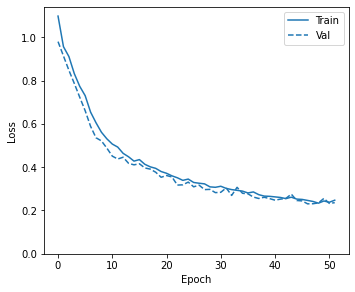

In [15]:
gene_classifier.plot_metrics()

In [16]:
gene_classifier.evaluate()

20/20 [==============================] - 0s 4ms/step - loss: 0.3131 - sparse_categorical_accuracy: 0.9040


In [17]:
gene_classifier.evaluate_classes()

predict_class   bi  bias  poo    z
class_names                       
bi             229     6    0    1
biased          17    77    0    1
poo              0     0    9    0
tarme            8     0    0    7
z               13     7    0  250


In [18]:
# gene_classifier.predict_anndata()

In [19]:
# bdata = gene_classifier.get_adata()

In [20]:
# pd.crosstab(bdata.var.class_names, bdata.var.predicted_class)

In [21]:
import numpy as np
spliced_data = bdata.to_df(layer="spliced").transpose()
unspliced_data = bdata.to_df(layer="unspliced").transpose()
max_count_allele_1 = []
max_count_allele_2 = []
for x in bdata.var.index:
    max_count_allele_1.append(np.max(spliced_data.loc[x]))
    max_count_allele_2.append(np.max(unspliced_data.loc[x]))
    
bdata.var['max_count_allele_1'] = max_count_allele_1
bdata.var['max_count_allele_2'] = max_count_allele_2

NameError: name 'bdata' is not defined

In [ ]:
# bdata.var

In [ ]:
# bdata.write('data/adata_5_classes_2.h5ad')

In [ ]:
# test = bdata.var[bdata.var['predicted_class']=='tarme']
# test

In [ ]:
# for x in test.index:
#     utils.scatter_plot(bdata, x, xlabel='C57', ylabel='CAST')

In [ ]:
# adata.obs['n_counts'] = adata.X.sum(1)
# adata.var['UMI_counts_per_gene'] = adata.X.sum(0)

# adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
# adata.var['UMI_log_counts_per_gene'] = np.log(adata.var['UMI_counts_per_gene'])

In [ ]:
# sc.pl.scatter(adata, x='ratio_std_allele_1', y='UMI_log_counts_per_gene', color='class_label')